<a href="https://colab.research.google.com/github/MaoiHi/CS114.O21-21522684/blob/main/CS114_O21_O21_21522684_KHCL_BaoCaoDACK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BÁO CÁO BÀI TẬP THỰC HÀNH VÀ ĐỒ ÁN CUỐI KỲ

- Dành cho lớp CS114.O21 và CS114.O21.KHCL
- Lần cập nhật cuối cùng: 28/6/2024

## THÔNG TIN NHÓM

1. MSSV-21522684
  - Họ và Tên: Trần Thành Tín
  - Số buổi vắng: 4
  - Số bài tập quá trình: 0 note.
  - Điểm WeCode:
  + Bài thực hành 1 - làm quen python (4/8)
  + Bài tập thực hành 2 - vẫn làm quen python (5/10)
  + Ừ thì search (4/5)
  + Giờ là sort... và list (0/4)
  + CS114.O21.x - Competition 01 (1/1, 1000, late -> 800)
  + Dự đoán điểm từ dữ liệu nộp bài wecode (0/4)


## THÔNG TIN ĐỒ ÁN - THỰC HÀNH

Các SV cần mô tả đầy đủ, càng chi tiết càng tốt về các bài thực hành đã làm để có cơ sở tính điểm đồ án và thực hành.

1. Trang github của nhóm : https://github.com/MaoiHi/CS114.O21-21522684

2. Đồ án cuối kỳ: MotocycleClassification
- Tổng số lượng ảnh đóng góp: 50. Được thu thập thủ công.
![Image description](https://drive.google.com/uc?export=view&id=16xxQFjSr5-VtoSXpOBtmQ2Rcd3Z67Jqw)

- Phương pháp rút trích đặc trưng sử dụng: xxx (ví dụ điền MobileNetV2)
- Thuật toán học được sử dụng: xxx (ví dụ điền LogisticRegression)
- Framework, thư viện sử dụng: xxx (ví dụ điền Keras, PyTorch, Tensorflow, Scikit-learn)
- Kết quả Accuracy: xxx (ví dụ điền 79.25%). Xếp hạng: 15 (theo danh sách file CS114.O21-O21.KHCL.ScoreBoard.csv)

3. Danh sách các bài thực hành đã làm - điền thời điểm (ngày, giờ) nộp bài trên Classroom:
- Thống kê dữ liệu (CS114.Tool.DatasetStat.ipynb): Jun 08
- Tạo các splits (CS114.Tool.CreateSplit.ipynb): Jun 10
- Hiển thị các ảnh (CS114.Tool.DatasetViz.ipynb): Jun 10
- Ứng dụng Clustering (CS114.Clustering.ipynb): Jun 19
- Đánh giá Model (CS114.Evaluation.ipynb):

4. Bài tập - Dự đoán điểm IT001
- None

5. Bài tập - Nhận dạng chữ số viết tay
- Đóng góp 50 ảnh viết tay (mực, chì, paint)

## MÔ TẢ HỖ TRỢ CỦA CÁC CÔNG CỤ NHƯ CHATGPT, GEMINI, POE

- Code được viết với sự hỗ trợ của Copilot, tham khảo các bài liên quan trên Kaggle

## CODE CỦA ĐỒ ÁN MOTOCYCLECLASSIFICATION

1. Tham khảo các bước
  - https://keras.io/examples/vision/image_classification_from_scratch/

2. Các lưu ý:
  - Cần ghi rõ thông tin ngày cập nhật
  - Đoạn code của người khác nếu sử dụng lại, phải ghi tham chiếu để phân biệt đâu là code của mình, đâu là code của người khác
  - Cần phải có chú thích càng chi tiết càng tốt để code dễ đọc, dễ kiểm tra
  - Notebook nộp bài phải là notebook đã chạy và giữ lại output
  - Các hành vi gian lận sẽ bị trừng phạt rất nghiêm khắc

## CODE CHẠY CHO MỘT SPLIT

- Các cells bên dưới sẽ phục vụ cho một split
- Trước mỗi Code cell, nên có Text cell để giải thích

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import libaries
import pandas as pd
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import random
import keras
from keras import layers
from tensorflow import data as tf_data

from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input

# Load data

In [ ]:
# current split
curSplit = 1

szTrainFileName = "/content/drive/MyDrive/Public/MotocycleDataset-Splits-{}-Train.csv".format(curSplit)
szTestFileName = "/content/drive/MyDrive/Public/MotocycleDataset-Splits-{}-Test.csv".format(curSplit)

df = pd.read_csv(szTrainFileName, names=['image_dir','category_id'])
test_df  = pd.read_csv(szTestFileName, names=['image_dir','category_id'])
df.drop_duplicates()
df.count()

image_dir      28042
category_id    28042
dtype: int64

In [ ]:
df['category_id'].value_counts()

category_id
1    7900
3    6659
2    5200
0    5177
4    3106
Name: count, dtype: int64

In [ ]:
# Assuming your original DataFrame is named 'df'
out = df.groupby('category').sample(n=1000, replace=True)

In [ ]:
#to string
df['image_dir'] = df['image_dir'].apply(lambda x: os.path.join('/content/drive/MyDrive/Public', x))
df['category_id'] = df['category_id'].astype(str)

# Remove non valid path

In [ ]:
import time
def is_valid_image_pillow(file_path):
    try:
        format = Image.open(file_path).format
        if format.lower() not in ('jpeg', 'png', 'jpg', 'gif', 'bmp'):
            return False
        return True
    except (IOError, OSError):
        return False

# Assuming df is your DataFrame with columns 'images_path' and 'labels'
for index, row in df.iterrows():
    start_time = time.time()  # Record the start time
    file_path = row['image_dir']
    if not is_valid_image_pillow(file_path):
        df.drop(index, inplace=True)
    end_time = time.time()  # Record the end time
    elapsed_time = end_time - start_time
    print(f"{index}: {elapsed_time:.4f} seconds")


# If you want to reset the index after dropping rows
df.reset_index(drop=True, inplace=True)

df.count()

Streaming output truncated to the last 5000 lines.
23041: 0.4508 seconds
23042: 0.4608 seconds
23043: 0.4832 seconds
23044: 0.2587 seconds
23045: 0.3474 seconds
23046: 0.4586 seconds
23047: 0.2527 seconds
23048: 0.3886 seconds
23049: 0.2908 seconds
23050: 0.3400 seconds
23051: 0.3653 seconds
23052: 0.4145 seconds
23053: 0.2746 seconds
23054: 0.3900 seconds
23055: 0.5592 seconds
23056: 0.2851 seconds
23057: 0.3581 seconds
23058: 0.3149 seconds
23059: 0.0086 seconds
23060: 0.2549 seconds
23061: 0.3886 seconds
23062: 0.0067 seconds
23063: 0.2855 seconds
23064: 0.0074 seconds
23065: 0.4039 seconds
23066: 0.3301 seconds
23067: 0.2404 seconds
23068: 0.2547 seconds
23069: 0.2606 seconds
23070: 0.2662 seconds
23071: 0.3032 seconds
23072: 0.0080 seconds
23073: 0.2721 seconds
23074: 0.3100 seconds
23075: 0.2508 seconds
23076: 0.2798 seconds
23077: 0.3124 seconds
23078: 0.3705 seconds
23079: 0.4508 seconds
23080: 0.3772 seconds
23081: 0.2851 seconds
23082: 0.3558 seconds
23083: 0.5609 seconds
230

image_dir      27544
category_id    27544
dtype: int64

In [ ]:
#df.to_csv('/content/drive/MyDrive/data, model/filtered_df_1.csv', index=False)

# Remove bad directory

In [ ]:
def filter_jfif_images(df, image_column='image_dir'):
    indices_to_drop = []

    for index, row in df.iterrows():
        start_time = time.time()  # Record the start time
        file_path = row[image_column]
        try:
            with open(file_path, "rb") as fobj:
                is_jfif = b"JFIF" in fobj.peek(10)
        except Exception as e:
            is_jfif = False  # In case of any file opening or reading error, consider it not a JFIF file

        if not is_jfif:
            indices_to_drop.append(index)
        end_time = time.time()  # Record the end time
        elapsed_time = end_time - start_time
        print(f"{index}: {elapsed_time:.4f} seconds")

    return df.drop(indices_to_drop)


In [ ]:
df = filter_jfif_images(df)

df.count()

Streaming output truncated to the last 5000 lines.
22544: 0.0242 seconds
22545: 0.0082 seconds
22546: 0.0041 seconds
22547: 0.0084 seconds
22548: 0.0055 seconds
22549: 0.0042 seconds
22550: 0.0034 seconds
22551: 0.0081 seconds
22552: 0.0076 seconds
22553: 0.0085 seconds
22554: 0.0042 seconds
22555: 0.0040 seconds
22556: 0.0054 seconds
22557: 0.0047 seconds
22558: 0.0038 seconds
22559: 0.0047 seconds
22560: 0.0046 seconds
22561: 0.0036 seconds
22562: 0.0048 seconds
22563: 0.0031 seconds
22564: 0.0087 seconds
22565: 0.0035 seconds
22566: 0.0083 seconds
22567: 0.0089 seconds
22568: 0.0045 seconds
22569: 0.0034 seconds
22570: 0.0101 seconds
22571: 0.0032 seconds
22572: 0.0066 seconds
22573: 0.0059 seconds
22574: 0.0079 seconds
22575: 0.0043 seconds
22576: 0.0039 seconds
22577: 0.0064 seconds
22578: 0.0041 seconds
22579: 0.0098 seconds
22580: 0.0049 seconds
22581: 0.0032 seconds
22582: 0.0076 seconds
22583: 0.0041 seconds
22584: 0.0044 seconds
22585: 0.0072 seconds
22586: 0.0086 seconds
225

image_dir      23420
category_id    23420
dtype: int64

In [ ]:
#df.to_csv('/content/drive/MyDrive/data, model/filtered_df_2.csv', index=False)

In [ ]:
df = pd.read_csv('/content/filtered_df_2.csv')
df['category_id'] = df['category_id'].astype(str)

In [ ]:
df.dtypes

image_dir      object
category_id    object
dtype: object

In [ ]:
train_df, val_df = train_test_split(df, test_size=0.2, stratify=df['category_id'], random_state=42)

### Bước 1 - Dataset Visualization

No images found for category: Others


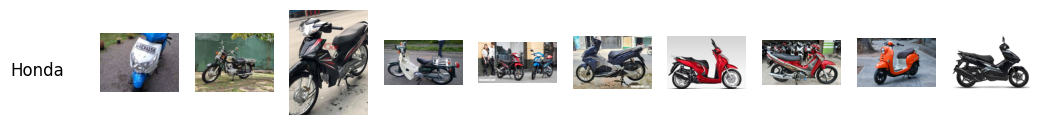

No images found for category: Suzuki
No images found for category: Yamaha
No images found for category: VinFast


ValueError: Sample larger than population or is negative

In [ ]:
# Define the mapping from CategoryID to brand names
category_to_brand = {
    '0': 'Others',
    '1': 'Honda',
    '2': 'Suzuki',
    '3': 'Yamaha',
    '4': 'VinFast'
}

# Parameters for display
NumImgsPerRow = 10
ImgHeight = ImgWidth = 150

# Initialize a dictionary to store image paths by category
category_images = {brand: [] for brand in category_to_brand.values()}

# Group images by category
for _, row in train_df.iterrows():
    image_path = row['image_dir']
    category_id = row['category_id']
    brand = category_to_brand[category_id] # category_id is now a string to match the keys in category_to_brand
    category_images[brand].append(image_path)

# Display a random selection of images for each category
for brand, images in category_images.items():
    # Check if there are enough images for this category
    num_images_to_display = min(NumImgsPerRow, len(images))
    if num_images_to_display > 0:  # Only proceed if there are images to display
        selected_images = random.sample(images, num_images_to_display)
        fig, axs = plt.subplots(1, num_images_to_display, figsize=(12, 2)) # Adjust the number of subplots
        plt.suptitle(f"{brand}", x=0.05, y=0.5, ha='left')
        for i, image_path in enumerate(selected_images):
            img = Image.open(os.path.join('/content/drive/MyDrive/Public', image_path))
            axs[i].imshow(img)
            axs[i].axis('off')
        plt.show()
    else:
        print(f"No images found for category: {brand}") # Inform the user if a category has no images

# Display a random selection of images for each category
#for brand, images in category_images.items():
#    selected_images = random.sample(images, NumImgsPerRow)
#    fig, axs = plt.subplots(1, NumImgsPerRow, figsize=(12, 2))
#    plt.suptitle(f"{brand}", x=0.05, y=0.5, ha='left')
#    for i, image_path in enumerate(selected_images):
#        img = Image.open(os.path.join('/content/drive/MyDrive/Public', image_path))
#        axs[i].imshow(img)
#        axs[i].axis('off')
#    plt.show()

### Bước 2 - Data Augmentation

- Làm giàu dữ liệu bằng các công cụ có sẵn từ các framework như Keras



In [ ]:
# Create an ImageDataGenerator with desired augmentations
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,  # Normalize pixel values to [0, 1]
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Generate train augmented images
train_generator = datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='image_dir',
    y_col='category_id',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_datagen = ImageDataGenerator(rescale=1./255) #rescale validation

#Generate test augmented images
val_generator = val_datagen.flow_from_dataframe(
    dataframe = val_df,
    x_col='image_dir',
    y_col='category_id',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 18736 validated image filenames belonging to 5 classes.
Found 4684 validated image filenames belonging to 5 classes.


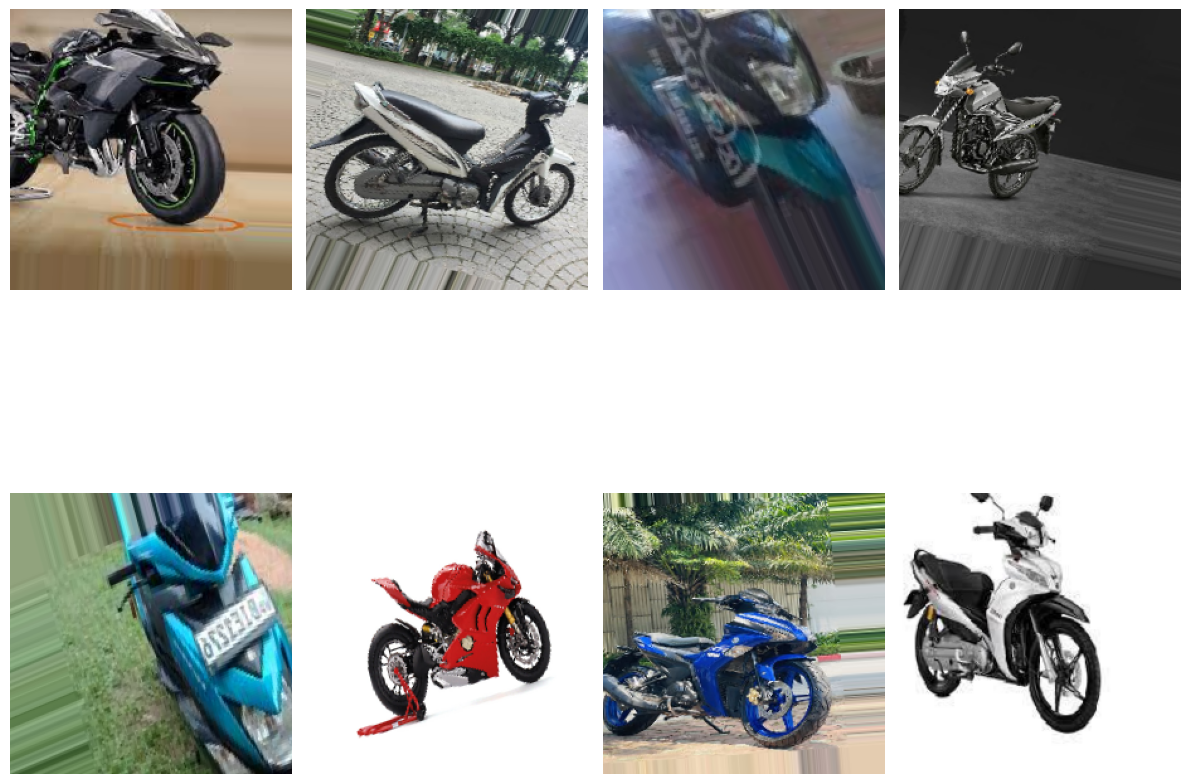

In [ ]:
# Generate a batch of augmented images
augmented_images = next(train_generator)

# Display a few augmented images
fig, axes = plt.subplots(2, 4, figsize=(12, 12))
for i, ax in enumerate(axes.flat):
    # Select a single image from the batch
    image = augmented_images[0][i]  # Access the i-th image from the batch
    ax.imshow(image)
    ax.axis("off")

plt.tight_layout()
plt.show()

### Bước 3 - Feature Extraction

Have not apply it yet

In [ ]:
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

### Bước 4 - Model Configuration

- Có thể chọn Logistic Regression

In [ ]:
# Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=(224, 224, 3)))
model.add(Conv2D(filters=64, kernel_size=(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.15))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.20))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(5, activation='softmax'))  # Assuming there are 5 categories


# Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#M odel display
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 220, 220, 32)      2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 216, 216, 64)      51264     
                                                                 
 max_pooling2d (MaxPooling2  (None, 108, 108, 64)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 108, 108, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 106, 106, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 104, 104, 256)     295168    
                                                        

### Bước 5 - Model Training

- Nên có visualize model accuracy, model loss để xem các hyperparameters có cần điều chỉnh không

In [ ]:
# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    callbacks=[early_stopping],
    batch_size=128
)

# Save the model
model.save('/content/drive/MyDrive/data, model/motorcycle_classifier.h5')

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()



Epoch 1/10
 21/586 [>.............................] - ETA: 2:07:33 - loss: 1.5935 - accuracy: 0.2426

### Bước 6 - Model Evaluation

- Dùng model (kết quả của bước Model Training) để predict CategoryID của các ảnh trong tập dữ liệu Test, sau đó tính Accuracy và Confusion Matrix

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import os

# Load the test dataset
test_df = pd.read_csv('motorcycles_test.csv')  # Assuming the test CSV file is named motorcycles_test.csv

# Load the trained model
model = load_model('motorcycle_classifier.h5')

# Function to preprocess images and make predictions, filtering out corrupted images
def preprocess_and_predict(img_path, model):
    try:
        img = image.load_img(img_path, target_size=(150, 150))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0) / 255.0
        predictions = model.predict(img_array)
        predicted_class = np.argmax(predictions, axis=1)
        return predicted_class[0]
    except Exception as e:
        print(f"Error loading image {img_path}: {e}")
        return None

# Apply the function to all images in the test dataset and filter out any None values
test_df['predicted_category'] = test_df['image_directory'].apply(lambda x: preprocess_and_predict(x, model))
test_df = test_df.dropna(subset=['predicted_category'])

# Save the predictions to a new CSV file
test_df.to_csv('motorcycles_predictions.csv', index=False)

print("Predictions saved to motorcycles_predictions.csv")

### Bước 7 - Submission

- Ghi kết quả ra tập tin CS114.O21-O21.KHCL.ScoreBoard.csv theo chế độ Append: https://drive.google.com/file/d/1qjGycdcIqsoag_yaVqY8UAUNmpFUkVFe/view?usp=sharing
- Quy ước:
  - Date: ví dụ 2024-06-11 10:32:19 (dùng hàm formatted_date = now.strftime("%Y-%m-%d %H:%M:%S"))
  - GroupID: các MSSV của thành viên trong nhóm cách nhau bằng dấu gạch ngang -, ví dụ 21522446-21522243
  - SplitID: giá trị từ 1 đến 5
  - Accuracy: giá trị theo quy ước dấu . phân cách phần thập phân, ví dụ 90.2345 - lấy đến 4 số thập phân
  - Desc: mô tả phương pháp, ví dụ Random. Mỗi nhóm có thể có rất nhiều trials, do đó cần phải mô tả tóm tắt về các trial để còn nhận diện
  
